In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# create the environment
env = Environment(shape = [10,10])

In [3]:
def generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1):
    ''' A function to output agents based on user defined variables
    Total_agents - Total number of agents
    prop_infants - Proportion of infants based on total agents
    prop_adults - Proportion of adults based on total agents
    prop_infected - Proportion of infected adults based on total number of adults
    Output: a list of agents'''
    
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
        
    return agents

In [10]:
def batch_simulation(Total_agents=100, prop_infants=0.1, prop_adults=0.9, prop_infected=0.1, num_model_runs=10):
    ''' A function to run the ecolab simulation several times to account for stochasticity
    It outputs the mean, standard deviation, and confidence interval of the proportion of infected rabbits '''
    
    batch_mean_infected = []
    
    for i in range(num_model_runs):
        agents = generate_agents(Total_agents=Total_agents, prop_infants=prop_infants,prop_adults=prop_adults,prop_infected=prop_infected)
        sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = 10)
        batch_prop_infected = np.divide(infected, total)
        batch_mean_infected.append(batch_prop_infected)
        
    mean_infected = np.mean(batch_mean_infected)
    stdev_infected = np.std(batch_mean_infected)
    ci_infected = 1.96 * stdev_infected / sqrt(len(batch_mean_infected))
    
    return batch_mean_infected, mean_infected, stdev_infected, ci_infected

In [11]:
batch_mean_infected_25, mean_infected_25, stdev_infected_25, ci_infected_25 = batch_simulation(Total_agents = 25, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
lower_25, upper_25 = mean_infected_25-ci_infected_25, mean_infected_25+ci_infected_25
print(f'The mean proportion of infected rabbits under an initialised population of 300 is: {mean_infected_25:.4f}')
print(f'The standard deviation is: {stdev_infected_25:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_25:.4f} and {upper_25:.4f}')

The mean proportion of infected rabbits under an initialised population of 300 is: 0.0348
The standard deviation is: 0.0559
It follows that the 95% confidence intervals are: 0.0002 and 0.0695


In [12]:
batch_mean_infected_50, mean_infected_50, stdev_infected_50, ci_infected_50 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
lower_50, upper_50 = mean_infected_50-ci_infected_50, mean_infected_50+ci_infected_50
print(f'The mean proportion of infected rabbits under an initialised population of 50 is: {mean_infected_50:.4f}')
print(f'The standard deviation is: {stdev_infected_50:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_50:.4f} and {upper_50:.4f}')

The mean proportion of infected rabbits under an initialised population of 50 is: 0.0436
The standard deviation is: 0.0800
It follows that the 95% confidence intervals are: -0.0060 and 0.0932


In [13]:
batch_mean_infected_100, mean_infected_100, stdev_infected_100, ci_infected_100 = batch_simulation(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
lower_100, upper_100 = mean_infected_100-ci_infected_100, mean_infected_100+ci_infected_100
print(f'The mean proportion of infected rabbits under an initialised population of 100 is: {mean_infected_100:.4f}')
print(f'The standard deviation is: {stdev_infected_100:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_100:.4f} and {upper_100:.4f}')

The mean proportion of infected rabbits under an initialised population of 100 is: 0.0481
The standard deviation is: 0.1002
It follows that the 95% confidence intervals are: -0.0140 and 0.1103


In [ ]:
batch_mean_infected_200, mean_infected_200, stdev_infected_200, ci_infected_200 = batch_simulation(Total_agents = 200, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
lower_200, upper_200 = mean_infected_200-ci_infected_200, mean_infected_200+ci_infected_200
print(f'The mean proportion of infected rabbits under an initialised population of 200 is: {mean_infected_200:.4f}')
print(f'The standard deviation is: {stdev_infected_200:.4f}')
print(f'It follows that the 95% confidence intervals are: {lower_200:.4f} and {upper_200:.4f}')

We should look to test whether the means under the different initial populations are statistically equal to each other

H_0: The two sample means are equal

H_a: The two sample means are not equal

In [ ]:
import scipy.stats as stats
t, p = stats.ttest_ind_from_stats(mean_infected_25, stdev_infected_25, 10, mean_infected_50, stdev_infected_50, 10, equal_var=False)
t, p

The p-value is greater than alpha of 0.05 (95% confidence) therefore we fail to reject the null hypothesis. There is no sufficient evidence to conclude that at initial populations of 50 and 100, their proportions of infected rabbits are different

In [ ]:
t1,p1 = stats.ttest_ind_from_stats(mean_infected_50, stdev_infected_50, 10, mean_infected_100, stdev_infected_100, 10, equal_var=False)
t1,p1

t2,p2 = stats.ttest_ind_from_stats(mean_infected_100, stdev_infected_100, 10, mean_infected_200, stdev_infected_200, 10, equal_var=False)
t2,p2

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pop_size_list = [25,50,100,200]
yer1 = [ci_infected_25, ci_infected_50, ci_infected_100, ci_infected_200]
prop_infected_rabbits = [mean_infected_25,mean_infected_50,mean_infected_100,mean_infected_200]
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1
ax.set_xlabel('Initial Population Size')
ax.set_ylabel('Proportion of Infected Rabbits')
plt.show()

In [ ]:
import seaborn as sns
sns.boxplot(x=[25,50,100,200], y=[batch_mean_infected_25,batch_mean_infected_50,batch_mean_infected_100,batch_mean_infected_200] )

In [8]:
sus, infected, immune, total, infant, agents = run_ecolab(env, agents_sample, Niteration=[0, 365], max_density = 10)

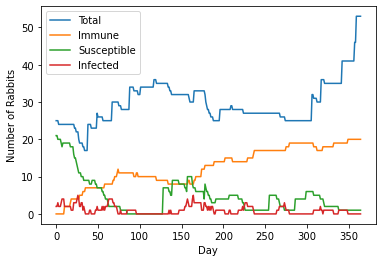

In [9]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total, label='Total')
ax.plot(immune, label='Immune')
ax.plot(sus, label='Susceptible')
ax.plot(infected, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')

leg = ax.legend();

In [ ]:
#def draw_animation(fig,record,fps=20,saveto=None):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros_like(record[0]['infected agents']), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    #foxesplot = ax.plot(np.zeros(1),np.zeros(1),'bo',markersize=10)
    rabbitsplot = ax.plot(np.zeros(1),np.zeros(1),'yx',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(record[i]['infected agents'])
            ags = record[i]['total']
            if len(ags)==0:
                rabbitsplot[0].set_data([],[])
                #foxesplot[0].set_data([],[])
                return
            coords = ags[ags[:,-1].astype(bool),0:2]
            rabbitsplot[0].set_data(coords[:,1],coords[:,0])
            #coords = ags[~ags[:,-1].astype(bool),0:2]
            #foxesplot[0].set_data(coords[:,1],coords[:,0])
            #return [im]#,rabbits,foxes]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

In [ ]:
def batch_simulation2(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10):
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    batch_mean_sus, batch_mean_infected, batch_mean_immune = [], [], []
    batch_infant, batch_total = [], []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
    
    for i in range(num_model_runs):
        sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = 10)
        batch_infant.append(infant)
        batch_total.append(total)
        batch_prop_sus, batch_prop_infected, batch_prop_immune = np.divide(sus, total), np.divide(infected, total), np.divide(immune, total)
        batch_mean_sus.append(batch_prop_sus)
        batch_mean_infected.append(batch_prop_infected)
        batch_mean_immune.append(batch_prop_immune)
        
    mean_sus, mean_infected, mean_immune = np.mean(batch_mean_sus), np.mean(batch_mean_infected), np.mean(batch_mean_immune)
    stdev_sus, stdev_infected, stdev_immune = np.std(batch_mean_sus), np.std(batch_mean_infected), np.std(batch_mean_immune)
    ci_sus = 1.96 * stdev_sus / sqrt(len(batch_mean_sus))
    ci_infected = 1.96 * stdev_infected / sqrt(len(batch_mean_infected))
    ci_immune = 1.96 * stdev_immune / sqrt(len(batch_mean_immune))
    
    return batch_infant, batch_total, mean_sus, mean_infected, mean_immune, stdev_sus, stdev_infected, stdev_immune, ci_sus, ci_infected, ci_immune